Name:- Trivedi Rajchandra Jitendra<br>
PRN:- 230940128033

### Implement Perceptron with Sigmoid Function

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import precision_recall_curve

In [112]:
## Setting up Config 

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible results

NOISE = 0.2
EPOCHS = 1000  # number of epochs
ALPHA = 0.01  # learning rate
N_SAMPLES = 1000

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

#### Generate a dataset

In [113]:
X, y = make_moons(n_samples=1000, noise=NOISE, random_state=RANDOM_STATE)

In [114]:
df = pd.DataFrame(X, columns=['A', 'B'])
df['target'] = y
df.head()

,A,B,target
0,-0.111667,0.520224,1
1,1.142650,-0.342577,1
2,0.795558,-0.011442,1
3,0.111827,-0.551932,1
4,-0.816466,0.543996,0


#### Visualizing the data

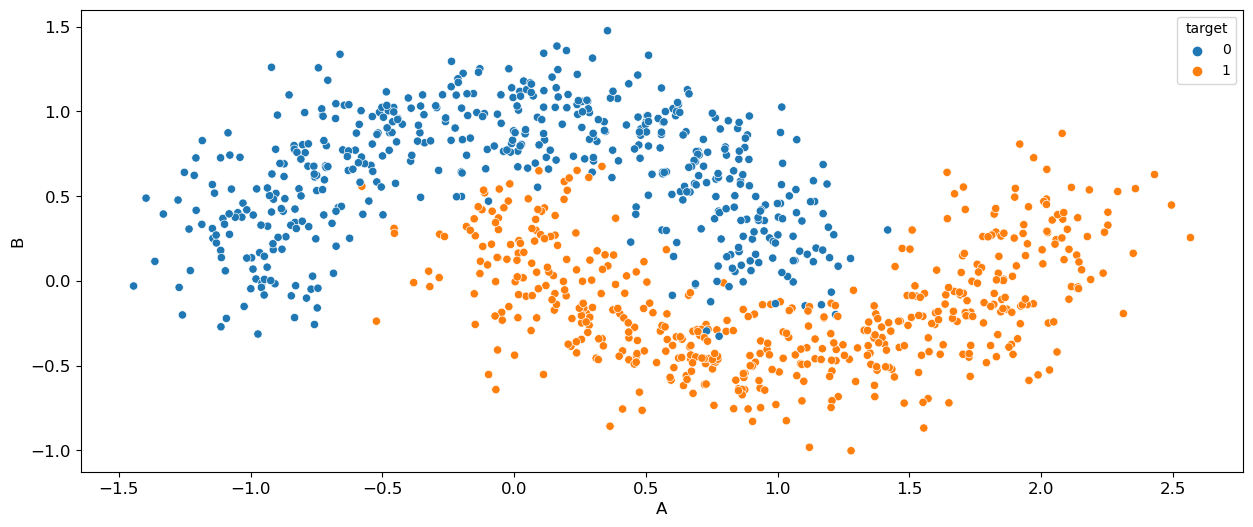

In [115]:
sns.scatterplot(data=df, x='A', y='B', hue='target');

#### Splitting the data

In [116]:
X_train = X[:900]
X_test = X[900:]
y_train = y[:900]
y_test = y[900:]

#### Training the model

In [117]:
def sigmoid(value):
    ''' Calculates the sigmoid for a given value.'''
    return  1 / (1 + np.exp(-value))


def predict(row, weights):
    ''' Make the prediction taking input as single training sample and weights.

        row (ndarray (1, n)): One training sample.
        weights (ndarray (1, n)): Weights for each column including bias.

        Returns
            prediction (float) - The probability of row being 1.
    '''
    bias = weights[-1]
    z = bias
    for i in range(len(row)):
        z += weights[i]*row[i]     # Calculate the weighted sum of features
    prediction = sigmoid(z)       # Apply the sigmoid activation function
    return prediction

In [118]:
def train_model(X_train, y_train, alpha, epochs):
    '''
        Train the logistic regression model using gradient descent.

        Parameters:
        - X_train (ndarray): Training data features, shape (m, n) where m is the number of samples and n is the number of features.
        - y_train (ndarray): Training data labels, shape (m,).
        - alpha (float): Learning rate for gradient descent.
        - epochs (int): Number of iterations for gradient descent.

        Returns:
        - errors (list): List containing the average loss for each epoch during training.
        - weights (list): List containing the final updated weights after all epochs.
    '''
    errors = []

    weights = rng.random(X_train.shape[1] + 1)    # Initalizing the random weights
    m = X_train.shape[0]            # Number of training samples

    for _ in range(epochs):
        loss = 0 
        dwi = np.zeros(weights.shape[0]-1)
        db = 0
        for row, y_true_i in zip(X_train, y_train):
            # predicting the value for a row
            a_i = predict(row, weights)

            # Calculating the loss
            loss += -(y_true_i * np.log(a_i) + (1-y_true_i) * np.log(1-a_i))

            # Calculating the cummulative weight update for all features and bias individually
            dz_i = a_i - y_true_i
            for i in range(len(dwi)):
                dwi[i] += row[i] * dz_i
                db += dz_i

        # After all training samples
        # Calculating the average of loss
        loss = loss / m

        # Average of cummulative weights and updating all of the weights simultaneously
        dwi = dwi / m
        for i in range(len(weights)-1):
            weights[i] = weights[i] - alpha*dwi[i]

        # Average of cummulative bias and updating the bias
        db = db / m
        weights[-1] = weights[-1] - alpha*db

        errors.append(loss)
    
    return errors, weights

    
errors, final_weights = train_model(X_train, y_train, ALPHA, EPOCHS)

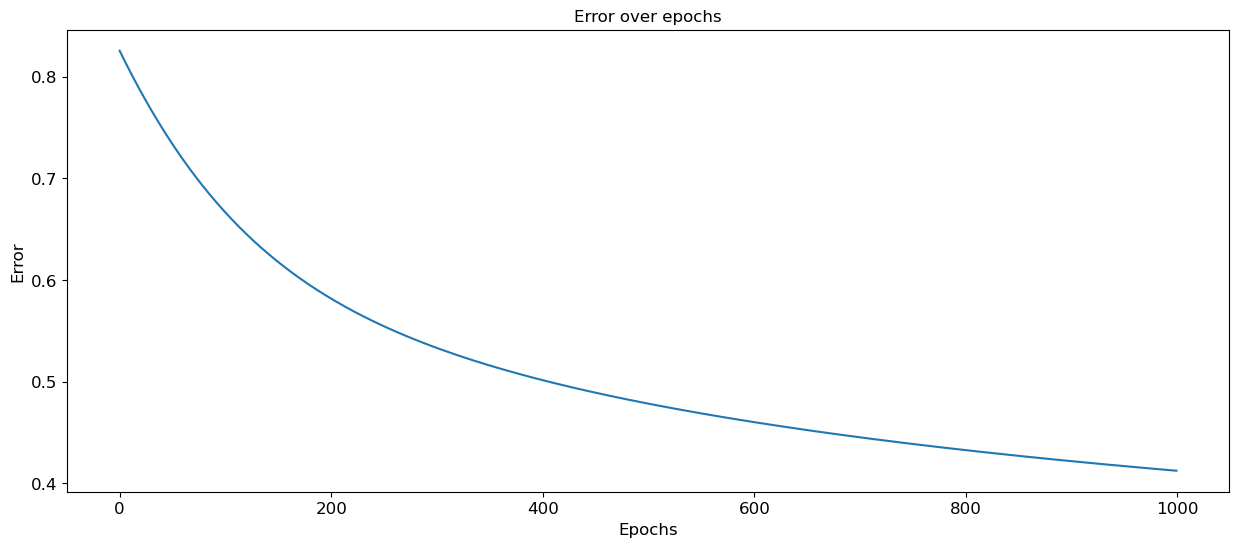

In [119]:
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error over epochs')
plt.show()

#### Evaluating on Test data

In [120]:
y_pred_prob = []
y_pred = []
for row in X_test:
    y_hat_i = predict(row, final_weights)
    y_pred_prob.append(y_hat_i)

    if y_hat_i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


print("Loss:", log_loss(y_test, y_pred_prob))
print("Accuracy Score:", accuracy_score(y_test, y_pred)*100, "%")

Loss: 0.40033149491467457
Accuracy Score: 82.0 %


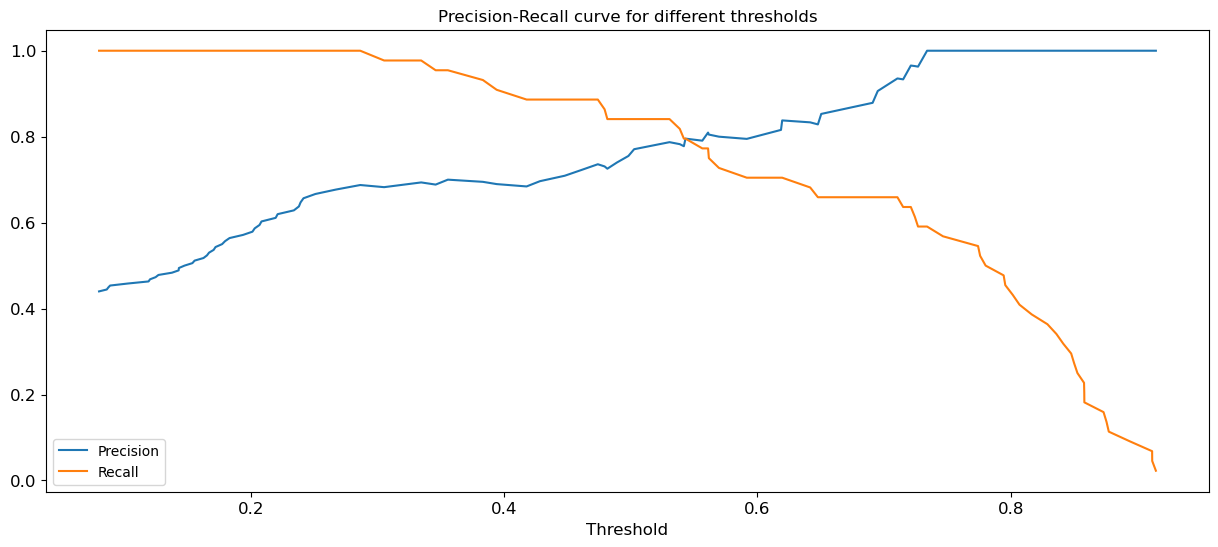

In [121]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.title('Precision-Recall curve for different thresholds')
plt.legend()
plt.show()

Analyzing the precision recall curve, we can now say that threshold values of 0.5 to 0.6 can do better job of classification.

In [122]:
y_pred_prob = []
y_pred = []
for row in X_test:
    y_hat_i = predict(row, final_weights)
    y_pred_prob.append(y_hat_i)

    if y_hat_i >= 0.52:
        y_pred.append(1)
    else:
        y_pred.append(0)


print("Loss:", log_loss(y_test, y_pred_prob))
print("Accuracy Score:", accuracy_score(y_test, y_pred)*100, "%")

Loss: 0.40033149491467457
Accuracy Score: 83.0 %
